# The Practical Data science Crash Course Hands-On!

## Classifying Iris flower

The iris flower dataset is a classical dataset commonly used to explain basic concepts for beginners in the field of data science. it can be reffered to as the "Hello World" example of machine learning.

the iris flower data set is a simple dataset with a set of four features and a single target variable. the features are:
1) sepal length
2) sepal width
3) petal length
4) petal width

the target variable which is the 5th feature is labelled "Name"

## Problem Statement

according to our dataset there are three classes of iris flowers and we can differentiate them based on the length and width of their sepals and petals.

this is a multiclass classififcation problem and we would be building a logistic regression classifier to classify the flowers. our evaluation metric will be the confusion matrix

to learn about the workings of the logistic regression model you can refer to this awesome blog by analytics vidhya:


### import relevant libraries

we will be using 3 libraries:
<p>
<b>Pandas library:</b> for reading and manipulating our data
</p>

<p>
<b>Scikit learn library:</b> for building and evaluating our model
</p>

<p>
<b>Matplotlib:</b> for visualization
</p>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data
data = pd.read_csv('iris.csv')

In [3]:
#inspect the first few rows of the dataset
data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#check how many entires are in the dataset
data.shape

(150, 5)

from above data.shape returns the number of rows and columns respectively. there are 150 rows and 5 columns
we can see that the first ten columns all belong to the same class. if the full data set explored we would see a pattern where the first 50 samples bel

In [5]:
data['Name'].nunique()

3

In [6]:
data['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
data.iloc[:50, :].tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa


In [10]:
data.iloc[50:100, :].tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [11]:
data.iloc[100:150, :].tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
#data = data.sample(frac = 1)

In [13]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
map_dict = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}


In [15]:
data['y'] = data.Name.map(map_dict)

In [16]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,y
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


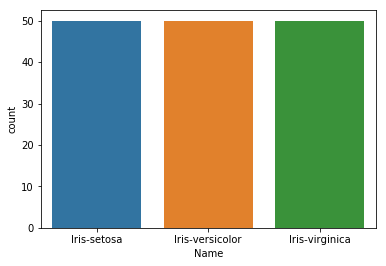

In [17]:
sns.countplot(data['Name'])

In [18]:
x = data.drop(['Name', 'y'], axis = 1)
y = data['y']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

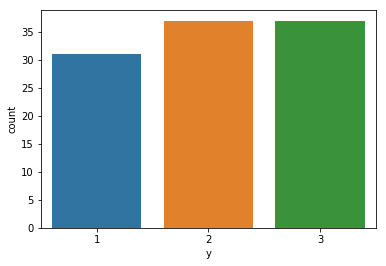

In [20]:
sns.countplot(y_train)

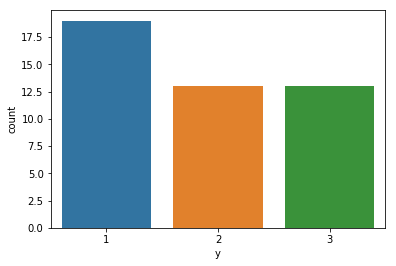

In [21]:
sns.countplot(y_test)

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
lr.score(x_train, y_train)

0.9619047619047619

In [24]:
pred = lr.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9777777777777777

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.92      0.96        13
           3       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [27]:
print(confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
